# Hybrid model : Fuzzy CMeans and Neural Network

In [1]:
import numpy as np 
import pandas as pd 
df = pd.read_csv(r"C:\Users\Sejal Hanmante\Downloads\Phishing Detection Dataset.zip")
df.head()


,Type,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,...,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
0,0,37,2,0,0,8,0,0,5,0,...,0,0,1,0,3,0,0,0,4.010412,2.751629
1,1,70,5,0,0,12,0,0,6,0,...,0,0,1,0,4,0,0,0,4.089470,3.532573
2,0,42,2,0,6,8,0,0,3,1,...,0,0,1,0,1,1,0,0,4.386016,3.344698
3,0,46,2,0,0,7,0,0,4,0,...,0,0,1,0,2,0,0,0,4.221947,3.189898
4,0,51,3,0,0,9,0,0,5,0,...,0,0,1,0,3,0,0,0,4.103538,2.952820


In [1]:
import numpy as np 
import pandas as pd 
pca_data=pd.read_csv(r"C:\Users\DELL\Documents\GitHub\Phishing-url-detection\pca_data.csv",index_col=[0])
pca_data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42
0,1.355103,0.374723,-0.847538,1.444457,-0.269435,0.582533,-0.518248,-0.094391,-0.305998,-0.902024,...,-0.148379,-0.215384,-0.147475,0.886899,0.237549,-0.741902,0.036549,-0.542012,-0.363727,0.050966
1,0.819898,-0.006518,-0.782782,-2.364139,-0.849924,0.103269,-0.820576,0.760786,0.270542,0.064134,...,-0.098172,0.407620,0.119940,0.137893,-0.054673,0.788291,-0.621070,-0.541850,-0.126581,0.022341
2,1.217563,0.206911,-0.533419,-0.908161,-1.798203,0.532191,-0.190889,1.048848,-0.496761,-0.296198,...,0.207842,0.083817,0.129444,0.752606,-0.086619,-1.414484,0.115978,0.126460,-0.098412,0.042883
3,2.460119,0.816660,-1.165692,0.991246,0.426025,0.335449,-0.304665,-0.919650,-0.495699,-1.303336,...,-0.220583,0.205387,-0.234712,0.234143,0.039174,0.714097,0.018968,-0.273400,-0.234085,0.047169
4,3.794874,1.397170,-1.184590,0.924645,2.939978,-0.854234,3.340179,2.761792,0.205402,0.789918,...,-0.575246,0.570667,0.391723,-0.687776,-0.675614,-0.519086,-0.298555,0.460071,0.043517,0.014826


In [4]:
!pip install scikit-fuzzy


   ---------------------------------------- 0.0/920.8 kB ? eta -:--:--
   ---------------------------------------- 10.2/920.8 kB ? eta -:--:--
   - ------------------------------------- 30.7/920.8 kB 435.7 kB/s eta 0:00:03
   --- ----------------------------------- 92.2/920.8 kB 871.5 kB/s eta 0:00:01
   ----------- ---------------------------- 256.0/920.8 kB 2.0 MB/s eta 0:00:01
   ------------------------- -------------- 583.7/920.8 kB 3.1 MB/s eta 0:00:01
   ------------------------------------- -- 860.2/920.8 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 920.8/920.8 kB 3.4 MB/s eta 0:00:00


In [5]:
import skfuzzy as fuzz
import numpy as np

# Assuming your dataset is loaded into X (features of the URLs)


# Set the number of clusters (e.g., 2: phishing, benign)
n_clusters = 2

# Fuzzy C-means clustering
cntr, u, _, _, _, _, _ = fuzz.cmeans(pca_data.T, c=n_clusters, m=2, error=0.005, maxiter=1000)

# u gives the membership values of each data point in each cluster
# For each data point, you can assign membership values to your dataset


In [7]:
labels = pd.read_csv(r"C:\Users\DELL\Documents\GitHub\Phishing-url-detection\output_column.csv")
labels = labels['label'].values

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Adding FCM membership values as additional features
X_fcm = np.hstack((pca_data, u.T))  # Concatenate original features and fuzzy membership values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_fcm, labels, test_size=0.2, random_state=42)

# Scaling the features (important for NN performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build a simple feed-forward neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification (phishing or benign)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy*100:.2f}%')


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9914 - loss: 0.0327 - val_accuracy: 0.9999 - val_loss: 3.2517e-04
Epoch 2/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9999 - loss: 6.1235e-04 - val_accuracy: 1.0000 - val_loss: 1.5174e-04
Epoch 3/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9999 - loss: 4.3713e-04 - val_accuracy: 0.9999 - val_loss: 1.3600e-04
Epoch 4/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9999 - loss: 5.9189e-04 - val_accuracy: 1.0000 - val_loss: 2.5165e-04
Epoch 5/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9999 - loss: 3.4378e-04 - val_accuracy: 0.9999 - val_loss: 1.6909e-04
Epoch 6/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9999 - loss: 2.7521e-04 - val_accuracy: 0.9999 - val_loss: 2.9742e-04
Epoch 7/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9999 - loss: 2.1361e-04 - val_accuracy: 0.9999 - val_loss: 5.3669e-04
Epoch 8/10
5895/5895 ━━━━━━━━━━

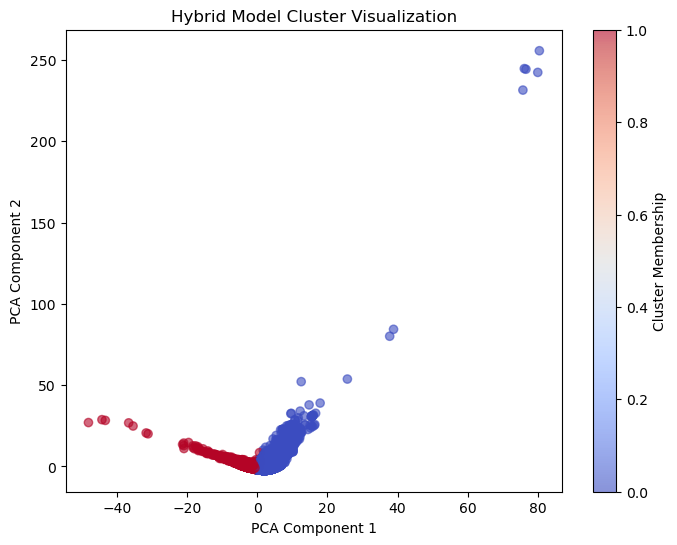

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensions using PCA (for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_fcm)  # X_fcm contains both PCA features & FCM memberships

# Get cluster memberships from FCM
cluster_labels = np.argmax(u, axis=0)  # Assign the cluster with highest membership

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='coolwarm', alpha=0.6)

# Add legend and labels
plt.colorbar(scatter, label="Cluster Membership")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Hybrid Model Cluster Visualization")

plt.show()


In [8]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Get cluster assignments from Fuzzy C-Means (FCM)
cluster_labels = np.argmax(u, axis=0)  # Assigns the cluster with highest membership

# Compute Davies-Bouldin Index (Lower is better)
dbi_score = davies_bouldin_score(X_fcm, cluster_labels)

# Compute Calinski-Harabasz Score (Higher is better)
chs_score = calinski_harabasz_score(X_fcm, cluster_labels)

# Print the results
print(f"Davies-Bouldin Index (DBI): {dbi_score:.4f} (Lower is better)")
print(f"Calinski-Harabasz Score (CHS): {chs_score:.4f} (Higher is better)")


Davies-Bouldin Index (DBI): 1.8853 (Lower is better)
Calinski-Harabasz Score (CHS): 42453.8106 (Higher is better)


In [14]:
import numpy as np
import skfuzzy as fuzz
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier  # Using scikit-learn's NN for easier cross-validation

# Sample data (replace with your actual features and labels)


# Perform Fuzzy C-Means Clustering
n_clusters = 2
cntr, u, _, _, _, _, _ = fuzz.cmeans(pca_data.T, c=n_clusters, m=2, error=0.005, maxiter=1000)

# Add fuzzy membership values as features
X_fcm = np.hstack((pca_data, u.T))

# Define a function to build the Neural Network (can also use other models like MLP from scikit-learn)
def build_nn():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X_fcm.shape[1]))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification (phishing or benign)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Option 1: Using K-Fold Cross-Validation with scikit-learn's MLPClassifier (easier for cross-validation)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
fold_accuracies = []

# Iterate over each fold
for train_idx, test_idx in kf.split(X_fcm):
    X_train, X_test = X_fcm[train_idx], X_fcm[test_idx]
    y_train, y_test = labels[train_idx], labels[test_idx]

    # Scale features for neural network
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the Neural Network model
    model = build_nn()
    model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

    # Evaluate the model
    y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)  # Threshold at 0.5 for binary classification
    accuracy = accuracy_score(y_test, y_pred)
    fold_accuracies.append(accuracy)

# Calculate the average accuracy across all folds
avg_accuracy = np.mean(fold_accuracies)
print(f'Average Accuracy across 5 folds: {avg_accuracy*100:.2f}%')

# Option 2: Using cross_val_score from scikit-learn with a simpler model (MLPClassifier)
# Use MLPClassifier for cross-validation
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=10, solver='adam', random_state=42)
cross_val_scores = cross_val_score(mlp, X_fcm, labels, cv=5, scoring='accuracy')

print(f'Cross-validation scores (Accuracy) for MLPClassifier: {cross_val_scores}')
print(f'Average accuracy: {np.mean(cross_val_scores)*100:.2f}%')


d:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1474/1474 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


d:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1474/1474 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


d:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1474/1474 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


d:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1474/1474 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


d:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1474/1474 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Average Accuracy across 5 folds: 99.99%


d:\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation scores (Accuracy) for MLPClassifier: [0.99985157 0.99989398 0.99989398 0.99989398 0.99989398]
Average accuracy: 99.99%


d:\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


# 1D CNN on URL Sequences

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split

In [6]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Embedding, Dropout, Dense
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv(r'E:\Github repos\Phishing-url-detection\phiusiil+phishing+url+dataset\PhiUSIIL_Phishing_URL_Dataset.csv')
urls = df['URL'].astype(str)
labels = df['label'].astype(int)  # Make sure the label column exists

# Tokenization
tokenizer = Tokenizer(char_level=True)  # character-level tokenization
tokenizer.fit_on_texts(urls)
sequences = tokenizer.texts_to_sequences(urls)
X_seq = pad_sequences(sequences, maxlen=200)  # truncate/pad URLs

# Split
X_train_seq, X_test_seq, y_train, y_test = train_test_split(X_seq, labels, test_size=0.2, random_state=42)

# Model
model_cnn = Sequential([
    Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32, input_length=200),
    Conv1D(64, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model_cnn.fit(X_train_seq, y_train, epochs=10, batch_size=32, validation_data=(X_test_seq, y_test))

# Evaluate
loss, acc = model_cnn.evaluate(X_test_seq, y_test)
print(f'CNN Accuracy: {acc*100:.2f}%')



Epoch 1/10


e:\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


5895/5895 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9810 - loss: 0.0508 - val_accuracy: 0.9974 - val_loss: 0.0154
Epoch 2/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9980 - loss: 0.0145 - val_accuracy: 0.9980 - val_loss: 0.0113
Epoch 3/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9980 - loss: 0.0136 - val_accuracy: 0.9980 - val_loss: 0.0112
Epoch 4/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9984 - loss: 0.0109 - val_accuracy: 0.9979 - val_loss: 0.0128
Epoch 5/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9983 - loss: 0.0110 - val_accuracy: 0.9981 - val_loss: 0.0118
Epoch 6/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9985 - loss: 0.0093 - val_accuracy: 0.9980 - val_loss: 0.0119
Epoch 7/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9984 - loss: 0.0098 - val_accuracy: 0.9979 - val_loss: 0.0140
Epoch 8/10
5895/5895 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9984 - loss: 0.0089 - val

# Transformer-Based Model 

In [2]:
# Load data
df = pd.read_csv(r'E:\Github repos\Phishing-url-detection\phiusiil+phishing+url+dataset\PhiUSIIL_Phishing_URL_Dataset.csv')
urls = df['URL'].astype(str)
labels = df['label'].astype(int)  # Make sure the label column exists


In [3]:
from transformers import TFBertModel
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling1D, Lambda
from tensorflow.keras.models import Model
import tensorflow as tf 

# Load pretrained BERT model
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Define Inputs
input_ids = Input(shape=(50,), dtype=tf.int32, name='input_ids')
attention_mask = Input(shape=(50,), dtype=tf.int32, name='attention_mask')

# Wrap BERT inside a Lambda with output_shape explicitly defined
def bert_layer(inputs):
    input_ids, attention_mask = inputs
    outputs = bert_model(input_ids=input_ids, attention_mask=attention_mask)
    return outputs.last_hidden_state  # shape: (None, 50, 768)

bert_output = Lambda(
    bert_layer,
    output_shape=(50, 768),  # Specify expected output shape
    name="bert_embedding"
)([input_ids, attention_mask])

# Classifier Head
x = GlobalAveragePooling1D()(bert_output)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Compile Model
model = Model(inputs=[input_ids, attention_mask], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [4]:
from transformers import BertTokenizer

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Suppose you have your data in these two variables:
# texts = list of strings (URLs or sentences)
# labels = binary labels (0 or 1)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    urls, labels, test_size=0.2, random_state=42
)

# Tokenize your train/test text data
train_tokens = tokenizer(
    list(X_train),                  # Make sure X_train is a list/Series of strings
    max_length=50,
    padding='max_length',
    truncation=True,
    return_tensors='tf'
)

test_tokens = tokenizer(
    list(X_test),
    max_length=50,
    padding='max_length',
    truncation=True,
    return_tensors='tf'
)


In [5]:
model.fit(
    x={
        'input_ids': train_tokens['input_ids'],
        'attention_mask': train_tokens['attention_mask']
    },
    y=y_train,
    validation_data=(
        {
            'input_ids': test_tokens['input_ids'],
            'attention_mask': test_tokens['attention_mask']
        },
        y_test
    ),
    epochs=3,
    batch_size=16
)


Epoch 1/3
11790/11790 ━━━━━━━━━━━━━━━━━━━━ 2506s 212ms/step - accuracy: 0.9874 - loss: 0.0414 - val_accuracy: 0.9977 - val_loss: 0.0125
Epoch 2/3
11790/11790 ━━━━━━━━━━━━━━━━━━━━ 2534s 215ms/step - accuracy: 0.9967 - loss: 0.0161 - val_accuracy: 0.9979 - val_loss: 0.0129
Epoch 3/3
11790/11790 ━━━━━━━━━━━━━━━━━━━━ 2597s 220ms/step - accuracy: 0.9974 - loss: 0.0133 - val_accuracy: 0.9980 - val_loss: 0.0120


In [6]:
loss, accuracy = model.evaluate(
    x={
        'input_ids': test_tokens['input_ids'],
        'attention_mask': test_tokens['attention_mask']
    },
    y=y_test
)

print(f'\n✅ Test Accuracy: {accuracy*100:.2f}%')

1474/1474 ━━━━━━━━━━━━━━━━━━━━ 477s 324ms/step - accuracy: 0.9977 - loss: 0.0130

✅ Test Accuracy: 99.80%
